In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr

path = r"\Users\Philipp\LRZ\2020_SS\_Applied Machine Intelligence\project\group01\prediction\co2_no_covid\zied\vectors"
overall = pd.read_csv(path+'/overall_vector.csv')
buildings = pd.read_csv(path+'/buildings.csv')
mobility = pd.read_csv(path+'/mobility.csv')
other_industries = pd.read_csv(path+'/other_industries.csv')
power_industry = pd.read_csv(path+'/power_industry.csv')

buildings = pd.DataFrame(buildings.transpose())
buildings.columns = buildings.iloc[0]
buildings.drop(buildings.index[[0]], axis = 0, inplace=True)
power_industry.drop(power_industry.index[[0]], axis = 0, inplace=True)

def getcountrycoviddata(country, startdate, enddate):
    import requests
    import json
    response = requests.get("https://api.covid19api.com/country/"+country+"?from="+startdate+"T00:00:00Z&to="+enddate+"T00:00:00Z")
    # Print the status code of the response.
    data = json.loads(response.content)
    pd_data = pd.read_json(response.content)
    pd_data = pd_data.drop(columns=['Lat', 'Lon', 'City', 'CityCode'])
    return pd_data
def getcountry_withoutprovinces_coviddata(country, startdate, enddate):
    import requests
    import json
    response = requests.get("https://api.covid19api.com/country/"+country+"?from="+startdate+"T00:00:00Z&to="+enddate+"T00:00:00Z")
    # Print the status code of the response.
    data = json.loads(response.content)
    pd_data = pd.read_json(response.content)
    pd_data = pd_data.drop(columns=['Lat', 'Lon', 'City', 'CityCode'])
    pd_data = pd_data.loc[pd_data['Province'] == '']
    return pd_data
def print_corr(country, sector, prediction, new, confirmed, deaths, pearson, spearman):
    print(country)
    print('Pearson correlation :')
    print('active cases: ')
    print(pearsonr(prediction[1:6], new)[0])
    print('confirmed cases: ')
    print(pearsonr(prediction[1:6], confirmed)[0])
    print('deaths: ')
    print(pearsonr(prediction[1:6], deaths)[0])
    print('Spearman correlation :')
    print('active cases: ')
    print(spearmanr(prediction[1:6], new)[0])
    print('confirmed cases: ')
    print(spearmanr(prediction[1:6], confirmed)[0])
    print('deaths: ')
    print(spearmanr(prediction[1:6], deaths)[0])
    pearson[sector][country] = pearsonr(prediction[1:6], new)[0]
    spearman[sector][country] = spearmanr(prediction[1:6], new)[0]
    return [pearson, spearman]

spearman = pd.DataFrame(index='canada china japan russia brazil india unitedStates EU'.split(),columns='overall buildings mobility power_industry other_industries'.split()) 
pearson = pd.DataFrame(index='canada china japan russia brazil india unitedStates EU'.split(),columns='overall buildings mobility power_industry other_industries'.split())

In [16]:
canada = getcountrycoviddata('canada', '2020-01-01', '2020-06-01')
china = getcountrycoviddata('china', '2020-01-01', '2020-06-01')
#unitedStates = getcountrycoviddata ('united-states', '2020-01-01', '2020-06-01')
japan = getcountrycoviddata ('japan', '2020-01-01', '2020-06-01')
russia = getcountrycoviddata ('russia', '2020-01-01', '2020-06-01')
brazil = getcountrycoviddata ('brazil', '2020-01-01', '2020-06-01')
india = getcountrycoviddata ('india', '2020-01-01', '2020-06-01')
#EU = getcountrycoviddata ('EU', '2020-01-01', '2020-01-01')

In [17]:
def daily_to_monthly(daily):
    dates =['2020-01-01-+0000','2020-02-01-+0000','2020-03-01-+0000','2020-04-01-+0000','2020-05-01-+0000','2020-06-01-+0000','2020-07-01-+0000']
    for i in range (len(dates)):
        dates[i] = pd.datetime.strptime(dates[i], '%Y-%m-%d-%z')
    daily['new'] = 0
    for i in range (len(daily)):
        for date in dates:
            if (daily['Date'].loc[i] == date):
                daily['new'].loc[i] = daily['Date'].loc[i]
    for i in range(len(daily)):
        if (daily['new'].loc[i] == 0):
            daily.drop(i, axis=0 , inplace=True)
    daily.drop('new',axis=1,inplace=True)
    return daily
def sumupprovinces(data):
    data = data.drop(columns=['Country', 'CountryCode', 'Province', 'Recovered'])
    dates =['2020-02-01-+0000','2020-03-01-+0000','2020-04-01-+0000','2020-05-01-+0000','2020-06-01-+0000']
    result = pd.DataFrame()
    for i in range (len(dates)):
        date = pd.datetime.strptime(dates[i], '%Y-%m-%d-%z')
        row = pd.DataFrame(data[data['Date'] == date].sum(axis=0))
        row = row.transpose()
        row['Date'] = date
        result = pd.concat([result, row])
    return result
        
    

In [18]:
india = daily_to_monthly(india)
japan = daily_to_monthly(japan)
russia = daily_to_monthly(russia)
brazil = daily_to_monthly(brazil)
canada = daily_to_monthly(canada)
china = daily_to_monthly(china)
#unitedStates = daily_to_monthly(unitedStates)

canada = sumupprovinces(canada)
china = sumupprovinces(china)
#unitedStates = sumupprovinces(unitedStates)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


india
Pearson correlation :
active cases: 
-0.020567172702162427
confirmed cases: 
0.008118130547677765
deaths: 
-0.0005337876369343637
Spearman correlation :
active cases: 
-0.49999999999999994
confirmed cases: 
-0.6
deaths: 
-0.5642880936468347
india
Pearson correlation :
active cases: 
-0.6905482125241642
confirmed cases: 
-0.6490361917840999
deaths: 
-0.6638731386006262
Spearman correlation :
active cases: 
-0.8999999999999998
confirmed cases: 
-0.9999999999999999
deaths: 
-0.9746794344808964
india
Pearson correlation :
active cases: 
0.005986940355853884
confirmed cases: 
0.026246048348359176
deaths: 
0.02111990377277323
Spearman correlation :
active cases: 
-0.49999999999999994
confirmed cases: 
-0.6
deaths: 
-0.5642880936468347
india
Pearson correlation :
active cases: 
-0.2899070840289282
confirmed cases: 
-0.25151960469796586
deaths: 
-0.264185974835769
Spearman correlation :
active cases: 
-0.49999999999999994
confirmed cases: 
-0.6
deaths: 
-0.5642880936468347
india
Pearson 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:112: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:113: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:123: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

brazil
Pearson correlation :
active cases: 
-0.00020719217531117544
confirmed cases: 
-0.006595764277649329
deaths: 
-0.005478835505478228
Spearman correlation :
active cases: 
0.3
confirmed cases: 
0.3
deaths: 
0.20519567041703082
brazil
Pearson correlation :
active cases: 
-0.33483742811809497
confirmed cases: 
-0.3280415417561835
deaths: 
-0.3297262571454359
Spearman correlation :
active cases: 
-0.7
confirmed cases: 
-0.7
deaths: 
-0.6668859288553501
brazil
Pearson correlation :
active cases: 
-0.2964925837913882
confirmed cases: 
-0.2938621085470603
deaths: 
-0.30679854215632346
Spearman correlation :
active cases: 
-0.6
confirmed cases: 
-0.6
deaths: 
-0.5642880936468347


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:145: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:146: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:156: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

brazil
Pearson correlation :
active cases: 
0.12715872076130186
confirmed cases: 
0.13130615161670853
deaths: 
0.1241629265283403
Spearman correlation :
active cases: 
-0.3
confirmed cases: 
-0.3
deaths: 
-0.20519567041703082
russia
Pearson correlation :
active cases: 
0.039282405645853
confirmed cases: 
0.09272644878674521
deaths: 
0.10549682830819052
Spearman correlation :
active cases: 
-0.09999999999999999
confirmed cases: 
-0.20519567041703082
deaths: 
-0.20519567041703082
russia
Pearson correlation :
active cases: 
-0.7273202195677354
confirmed cases: 
-0.6650605529840149
deaths: 
-0.6478366673727457
Spearman correlation :
active cases: 
-0.8999999999999998
confirmed cases: 
-0.9746794344808964
deaths: 
-0.9746794344808964


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:178: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:179: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:189: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

russia
Pearson correlation :
active cases: 
-0.8147820837284039
confirmed cases: 
-0.7302414154132989
deaths: 
-0.7077508458160362
Spearman correlation :
active cases: 
-0.7999999999999999
confirmed cases: 
-0.8720815992723809
deaths: 
-0.8720815992723809
russia
Pearson correlation :
active cases: 
0.2054083994101852
confirmed cases: 
0.26339492042475243
deaths: 
0.2767116820757042
Spearman correlation :
active cases: 
-0.09999999999999999
confirmed cases: 
-0.20519567041703082
deaths: 
-0.20519567041703082


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:211: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:212: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


russia
Pearson correlation :
active cases: 
0.06316996787104712
confirmed cases: 
0.1081823881265229
deaths: 
0.11888510132161434
Spearman correlation :
active cases: 
-0.09999999999999999
confirmed cases: 
-0.20519567041703082
deaths: 
-0.20519567041703082
canada
Pearson correlation :
active cases: 
-0.4705660918477061
confirmed cases: 
-0.46556230062757986
deaths: 
-0.38543432757272256
Spearman correlation :
active cases: 
-0.6
confirmed cases: 
-0.6
deaths: 
-0.5642880936468347
canada
Pearson correlation :
active cases: 
-0.7743359688466283
confirmed cases: 
-0.7754939769009908
deaths: 
-0.7886944094875153
Spearman correlation :
active cases: 
-0.6
confirmed cases: 
-0.6
deaths: 
-0.6668859288553501


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:222: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:233: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

canada
Pearson correlation :
active cases: 
-0.7101149182270946
confirmed cases: 
-0.7080605044117243
deaths: 
-0.6696396285162891
Spearman correlation :
active cases: 
-0.9999999999999999
confirmed cases: 
-0.9999999999999999
deaths: 
-0.9746794344808964
canada
Pearson correlation :
active cases: 
-0.17139469272293092
confirmed cases: 
-0.1647924156705809
deaths: 
-0.06426082715892698
Spearman correlation :
active cases: 
-0.6
confirmed cases: 
-0.6
deaths: 
-0.5642880936468347
canada
Pearson correlation :
active cases: 
-0.9377167914225075
confirmed cases: 
-0.9385243864393672
deaths: 
-0.9363246801431098
Spearman correlation :
active cases: 
-0.9999999999999999
confirmed cases: 
-0.9999999999999999
deaths: 
-0.9746794344808964


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:255: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:256: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:266: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

china
Pearson correlation :
active cases: 
-0.12738856197488188
confirmed cases: 
-0.7489277463024328
deaths: 
-0.47959111862270976
Spearman correlation :
active cases: 
-0.19999999999999998
confirmed cases: 
-0.09999999999999999
deaths: 
-0.09999999999999999
china
Pearson correlation :
active cases: 
0.7135359029599821
confirmed cases: 
-0.16424617042667297
deaths: 
-0.17307476981762734
Spearman correlation :
active cases: 
0.7
confirmed cases: 
-0.6
deaths: 
-0.6
china
Pearson correlation :
active cases: 
-0.6794882270168658
confirmed cases: 
-0.43177138816682525
deaths: 
-0.044535383985144256
Spearman correlation :
active cases: 
-0.39999999999999997
confirmed cases: 
0.0
deaths: 
0.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:288: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:289: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:299: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

china
Pearson correlation :
active cases: 
-0.8258699168323201
confirmed cases: 
-0.006357606617586525
deaths: 
0.38019545628046447
Spearman correlation :
active cases: 
-0.8999999999999998
confirmed cases: 
0.7
deaths: 
0.7
china
Pearson correlation :
active cases: 
0.12167665142062309
confirmed cases: 
-0.8349992442944487
deaths: 
-0.6559508208120074
Spearman correlation :
active cases: 
0.09999999999999999
confirmed cases: 
-0.3
deaths: 
-0.3


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:321: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:322: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


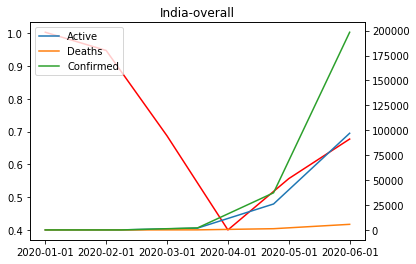

<Figure size 432x288 with 0 Axes>

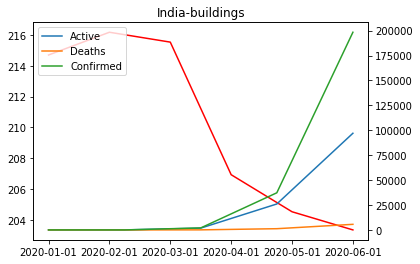

<Figure size 432x288 with 0 Axes>

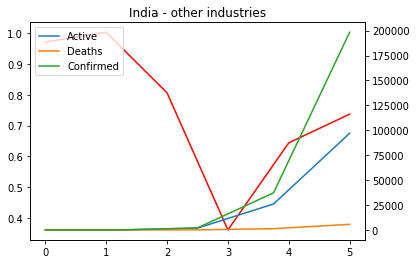

<Figure size 432x288 with 0 Axes>

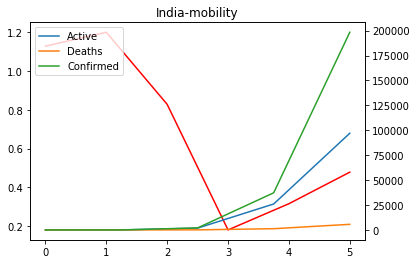

<Figure size 432x288 with 0 Axes>

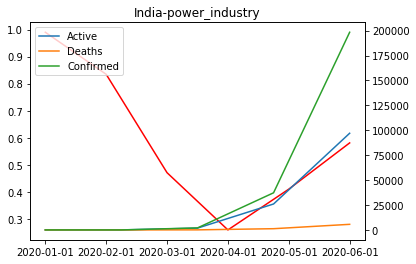

<Figure size 432x288 with 0 Axes>

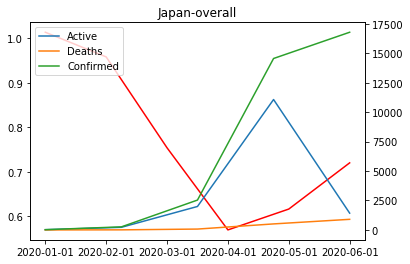

<Figure size 432x288 with 0 Axes>

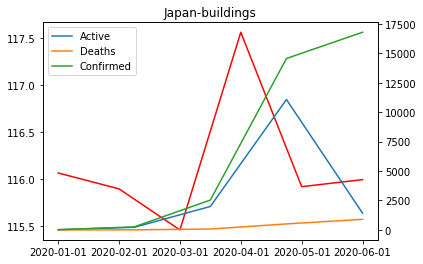

<Figure size 432x288 with 0 Axes>

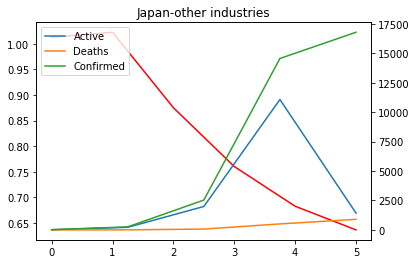

<Figure size 432x288 with 0 Axes>

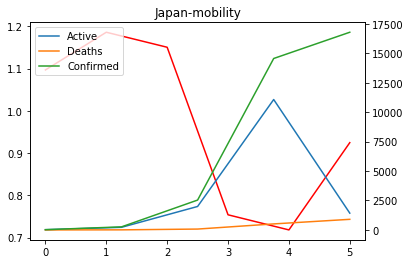

<Figure size 432x288 with 0 Axes>

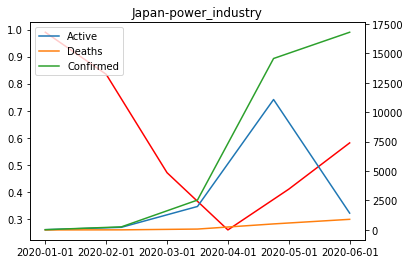

<Figure size 432x288 with 0 Axes>

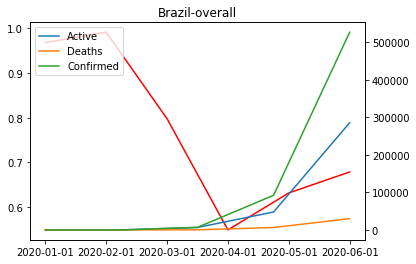

<Figure size 432x288 with 0 Axes>

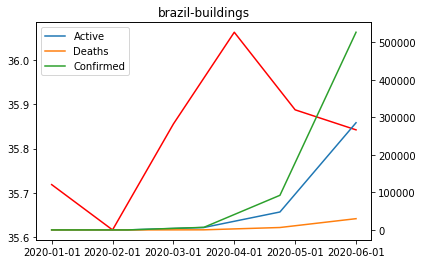

<Figure size 432x288 with 0 Axes>

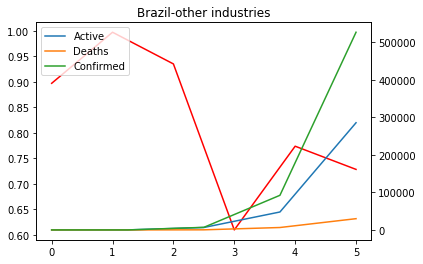

<Figure size 432x288 with 0 Axes>

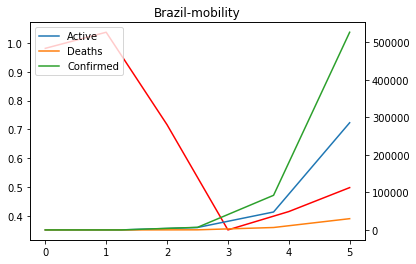

<Figure size 432x288 with 0 Axes>

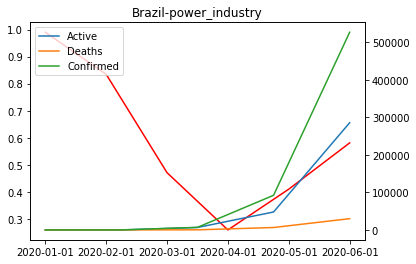

<Figure size 432x288 with 0 Axes>

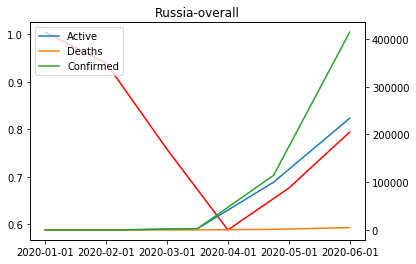

<Figure size 432x288 with 0 Axes>

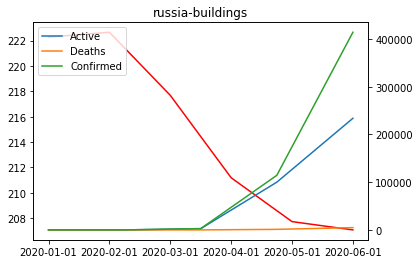

<Figure size 432x288 with 0 Axes>

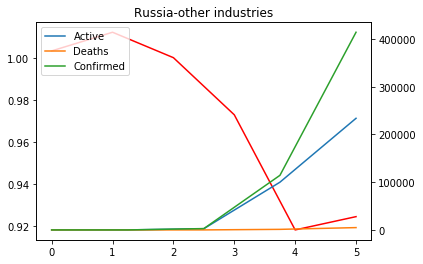

<Figure size 432x288 with 0 Axes>

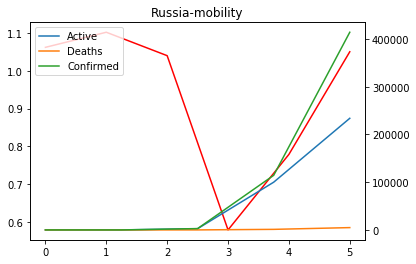

<Figure size 432x288 with 0 Axes>

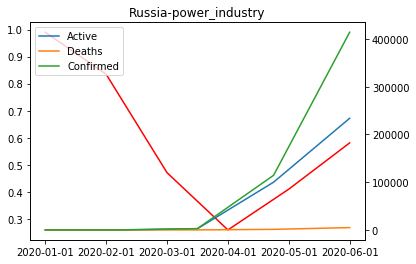

<Figure size 432x288 with 0 Axes>

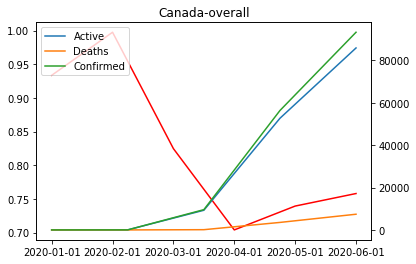

<Figure size 432x288 with 0 Axes>

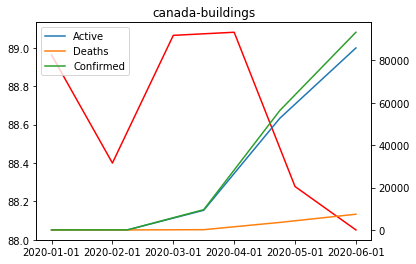

<Figure size 432x288 with 0 Axes>

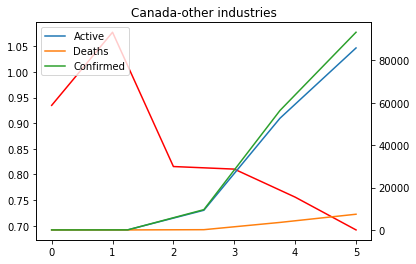

<Figure size 432x288 with 0 Axes>

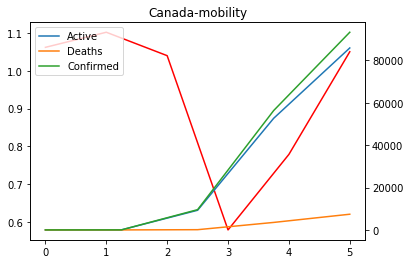

<Figure size 432x288 with 0 Axes>

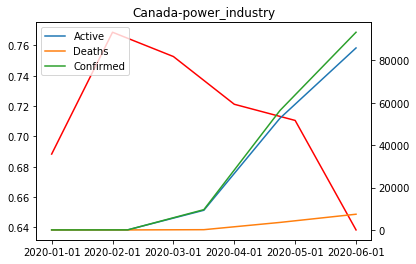

<Figure size 432x288 with 0 Axes>

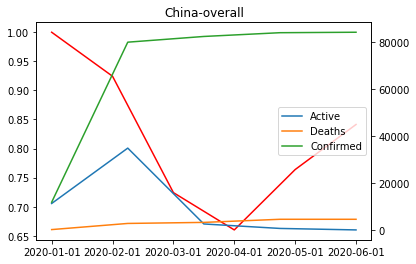

<Figure size 432x288 with 0 Axes>

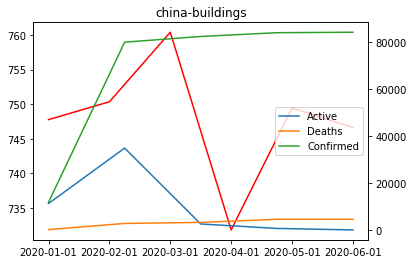

<Figure size 432x288 with 0 Axes>

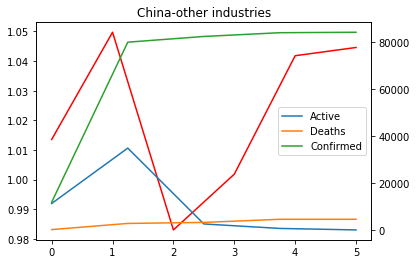

<Figure size 432x288 with 0 Axes>

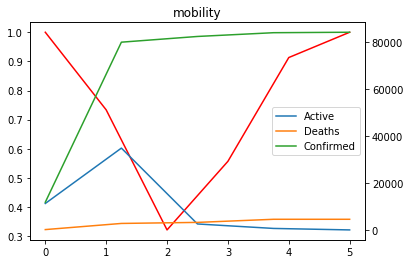

<Figure size 432x288 with 0 Axes>

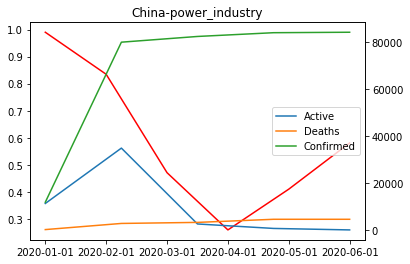

<Figure size 432x288 with 0 Axes>

In [19]:
#for country in countries:
fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(overall['Unnamed: 0'], overall['India'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,india['Active'])
ax2.plot(np.linspace(0,5,5) ,india['Deaths'])
ax2.plot(np.linspace(0,5,5) ,india['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('India-overall')
[pearson, spearman] = print_corr('india', 'overall', overall['India'], india['Active'], india['Confirmed'], india['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(overall['Unnamed: 0'], buildings['india'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,india['Active'])
ax2.plot(np.linspace(0,5,5) ,india['Deaths'])
ax2.plot(np.linspace(0,5,5) ,india['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('India-buildings')
[pearson, spearman] = print_corr('india', 'buildings', buildings['india'], india['Active'], india['Confirmed'], india['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(other_industries['Unnamed: 0'], other_industries['India'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,india['Active'])
ax2.plot(np.linspace(0,5,5) ,india['Deaths'])
ax2.plot(np.linspace(0,5,5) ,india['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('India - other industries')
[pearson, spearman] = print_corr('india', 'other_industries', other_industries['India'], india['Active'], india['Confirmed'], india['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(mobility['Unnamed: 0'], mobility['India'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,india['Active'])
ax2.plot(np.linspace(0,5,5) ,india['Deaths'])
ax2.plot(np.linspace(0,5,5) ,india['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('India-mobility')
[pearson, spearman] = print_corr('india', 'mobility', mobility['India'], india['Active'], india['Confirmed'], india['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(overall['Unnamed: 0'], power_industry['India'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,india['Active'])
ax2.plot(np.linspace(0,5,5) ,india['Deaths'])
ax2.plot(np.linspace(0,5,5) ,india['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('India-power_industry')
[pearson, spearman] = print_corr('india', 'power_industry', power_industry['India'], india['Active'], india['Confirmed'], india['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(overall['Unnamed: 0'], overall['Japan'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,japan['Active'])
ax2.plot(np.linspace(0,5,5) ,japan['Deaths'])
ax2.plot(np.linspace(0,5,5) ,japan['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('Japan-overall')
[pearson, spearman] = print_corr('japan', 'overall', overall['Japan'], japan['Active'], japan['Confirmed'], japan['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(overall['Unnamed: 0'], buildings['japan'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,japan['Active'])
ax2.plot(np.linspace(0,5,5) ,japan['Deaths'])
ax2.plot(np.linspace(0,5,5) ,japan['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('Japan-buildings')
[pearson, spearman] = print_corr('japan', 'buildings', buildings['japan'], japan['Active'], japan['Confirmed'], japan['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(other_industries['Unnamed: 0'], other_industries['Japan'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,japan['Active'])
ax2.plot(np.linspace(0,5,5) ,japan['Deaths'])
ax2.plot(np.linspace(0,5,5) ,japan['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('Japan-other industries')
[pearson, spearman] = print_corr('japan', 'other_industries', other_industries['Japan'], japan['Active'], japan['Confirmed'], japan['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(mobility['Unnamed: 0'], mobility['Japan'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,japan['Active'])
ax2.plot(np.linspace(0,5,5) ,japan['Deaths'])
ax2.plot(np.linspace(0,5,5) ,japan['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('Japan-mobility')
[pearson, spearman] = print_corr('japan', 'mobility', mobility['Japan'], japan['Active'], japan['Confirmed'], japan['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(overall['Unnamed: 0'], power_industry['Japan'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,japan['Active'])
ax2.plot(np.linspace(0,5,5) ,japan['Deaths'])
ax2.plot(np.linspace(0,5,5) ,japan['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('Japan-power_industry')
[pearson, spearman] = print_corr('japan', 'power_industry', power_industry['Japan'], japan['Active'], japan['Confirmed'], japan['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(overall['Unnamed: 0'], overall['Brazil'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,brazil['Active'])
ax2.plot(np.linspace(0,5,5) ,brazil['Deaths'])
ax2.plot(np.linspace(0,5,5) ,brazil['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('Brazil-overall')
[pearson, spearman] = print_corr('brazil', 'overall', overall['Brazil'], brazil['Active'], brazil['Confirmed'], brazil['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(overall['Unnamed: 0'], buildings['brazil'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,brazil['Active'])
ax2.plot(np.linspace(0,5,5) ,brazil['Deaths'])
ax2.plot(np.linspace(0,5,5) ,brazil['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('brazil-buildings')
[pearson, spearman] = print_corr('brazil', 'buildings', buildings['brazil'], brazil['Active'], brazil['Confirmed'], brazil['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(other_industries['Unnamed: 0'], other_industries['Brazil'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,brazil['Active'])
ax2.plot(np.linspace(0,5,5) ,brazil['Deaths'])
ax2.plot(np.linspace(0,5,5) ,brazil['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('Brazil-other industries')
[pearson, spearman] = print_corr('brazil', 'other_industries', other_industries['Brazil'], brazil['Active'], brazil['Confirmed'], brazil['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(mobility['Unnamed: 0'], mobility['Brazil'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,brazil['Active'])
ax2.plot(np.linspace(0,5,5) ,brazil['Deaths'])
ax2.plot(np.linspace(0,5,5) ,brazil['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('Brazil-mobility')
[pearson, spearman] = print_corr('brazil', 'mobility', mobility['Brazil'], brazil['Active'], brazil['Confirmed'], brazil['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(overall['Unnamed: 0'], power_industry['Brazil'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,brazil['Active'])
ax2.plot(np.linspace(0,5,5) ,brazil['Deaths'])
ax2.plot(np.linspace(0,5,5) ,brazil['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('Brazil-power_industry')
[pearson, spearman] = print_corr('brazil', 'power_industry', power_industry['Brazil'], brazil['Active'], brazil['Confirmed'], brazil['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(overall['Unnamed: 0'], overall['Russia'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,russia['Active'])
ax2.plot(np.linspace(0,5,5) ,russia['Deaths'])
ax2.plot(np.linspace(0,5,5) ,russia['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('Russia-overall')
[pearson, spearman] = print_corr('russia', 'overall', overall['Russia'], russia['Active'], russia['Confirmed'], russia['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(overall['Unnamed: 0'], buildings['russia'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,russia['Active'])
ax2.plot(np.linspace(0,5,5) ,russia['Deaths'])
ax2.plot(np.linspace(0,5,5) ,russia['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('russia-buildings')
[pearson, spearman] = print_corr('russia', 'buildings', buildings['russia'], russia['Active'], russia['Confirmed'], russia['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(other_industries['Unnamed: 0'], other_industries['Russia'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,russia['Active'])
ax2.plot(np.linspace(0,5,5) ,russia['Deaths'])
ax2.plot(np.linspace(0,5,5) ,russia['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('Russia-other industries')
[pearson, spearman] = print_corr('russia', 'other_industries', other_industries['Russia'], russia['Active'], russia['Confirmed'], russia['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(mobility['Unnamed: 0'], mobility['Russia'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,russia['Active'])
ax2.plot(np.linspace(0,5,5) ,russia['Deaths'])
ax2.plot(np.linspace(0,5,5) ,russia['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('Russia-mobility')
[pearson, spearman] = print_corr('russia', 'mobility', mobility['Russia'], russia['Active'], russia['Confirmed'], russia['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(overall['Unnamed: 0'], power_industry['Russia'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,russia['Active'])
ax2.plot(np.linspace(0,5,5) ,russia['Deaths'])
ax2.plot(np.linspace(0,5,5) ,russia['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('Russia-power_industry')
[pearson, spearman] = print_corr('russia', 'power_industry', power_industry['Russia'], russia['Active'], russia['Confirmed'], russia['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(overall['Unnamed: 0'], overall['Canada'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,canada['Active'])
ax2.plot(np.linspace(0,5,5) ,canada['Deaths'])
ax2.plot(np.linspace(0,5,5) ,canada['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('Canada-overall')
[pearson, spearman] = print_corr('canada', 'overall', overall['Canada'], canada['Active'], canada['Confirmed'], canada['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(overall['Unnamed: 0'], buildings['canada'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,canada['Active'])
ax2.plot(np.linspace(0,5,5) ,canada['Deaths'])
ax2.plot(np.linspace(0,5,5) ,canada['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('canada-buildings')
[pearson, spearman] = print_corr('canada', 'buildings', buildings['canada'], canada['Active'], canada['Confirmed'], canada['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(other_industries['Unnamed: 0'], other_industries['Canada'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,canada['Active'])
ax2.plot(np.linspace(0,5,5) ,canada['Deaths'])
ax2.plot(np.linspace(0,5,5) ,canada['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('Canada-other industries')
[pearson, spearman] = print_corr('canada', 'other_industries', other_industries['Canada'], canada['Active'], canada['Confirmed'], canada['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(mobility['Unnamed: 0'], mobility['Russia'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,canada['Active'])
ax2.plot(np.linspace(0,5,5) ,canada['Deaths'])
ax2.plot(np.linspace(0,5,5) ,canada['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('Canada-mobility')
[pearson, spearman] = print_corr('canada', 'mobility', mobility['Canada'], canada['Active'], canada['Confirmed'], canada['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(overall['Unnamed: 0'], power_industry['Canada'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,canada['Active'])
ax2.plot(np.linspace(0,5,5) ,canada['Deaths'])
ax2.plot(np.linspace(0,5,5) ,canada['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('Canada-power_industry')
[pearson, spearman] = print_corr('canada', 'power_industry', power_industry['Canada'], canada['Active'], canada['Confirmed'], canada['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(overall['Unnamed: 0'], overall['China'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,china['Active'])
ax2.plot(np.linspace(0,5,5) ,china['Deaths'])
ax2.plot(np.linspace(0,5,5) ,china['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('China-overall')
[pearson, spearman] = print_corr('china', 'overall', overall['China'], china['Active'], china['Confirmed'], china['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(overall['Unnamed: 0'], buildings['china'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,china['Active'])
ax2.plot(np.linspace(0,5,5) ,china['Deaths'])
ax2.plot(np.linspace(0,5,5) ,china['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('china-buildings')
[pearson, spearman] = print_corr('china', 'buildings', buildings['china'], china['Active'], china['Confirmed'], china['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(other_industries['Unnamed: 0'], other_industries['China'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,china['Active'])
ax2.plot(np.linspace(0,5,5) ,china['Deaths'])
ax2.plot(np.linspace(0,5,5) ,china['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('China-other industries')
[pearson, spearman] = print_corr('china', 'other_industries', other_industries['China'], china['Active'], china['Confirmed'], china['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(mobility['Unnamed: 0'], mobility['China'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,china['Active'])
ax2.plot(np.linspace(0,5,5) ,china['Deaths'])
ax2.plot(np.linspace(0,5,5) ,china['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('mobility')
[pearson, spearman] = print_corr('china', 'mobility', mobility['China'], china['Active'], china['Confirmed'], china['Deaths'], pearson,  spearman)

fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(overall['Unnamed: 0'], power_industry['China'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,china['Active'])
ax2.plot(np.linspace(0,5,5) ,china['Deaths'])
ax2.plot(np.linspace(0,5,5) ,china['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('China-power_industry')
[pearson, spearman] = print_corr('china', 'power_industry', power_industry['China'], china['Active'], china['Confirmed'], china['Deaths'], pearson,  spearman)

United States
Pearson correlation :
active cases: 
-0.020567172702162427
confirmed cases: 
0.008118130547677765
deaths: 
-0.0005337876369343637
Spearman correlation :
active cases: 
-0.49999999999999994
confirmed cases: 
-0.6
deaths: 
-0.5642880936468347


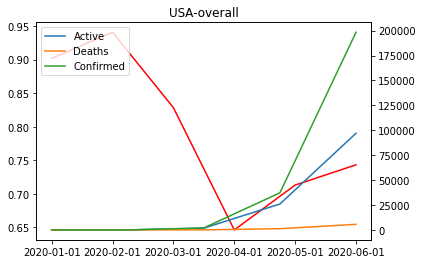

<Figure size 432x288 with 0 Axes>

In [27]:
#for country in countries:
fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(overall['Unnamed: 0'], overall['United States'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,india['Active'])
ax2.plot(np.linspace(0,5,5) ,india['Deaths'])
ax2.plot(np.linspace(0,5,5) ,india['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('USA-overall')
[pearson, spearman] = print_corr('United States', 'overall', overall['India'], india['Active'], india['Confirmed'], india['Deaths'], pearson,  spearman)


In [ ]:
#for country in countries:
fig, ax1 = plt.subplots()
fig = plt.figure(figsize=(6, 4))
ax1.plot(overall['Unnamed: 0'], overall['India'], color='red')
ax2 = ax1.twinx()
ax2.plot(np.linspace(0,5,5) ,india['Active'])
ax2.plot(np.linspace(0,5,5) ,india['Deaths'])
ax2.plot(np.linspace(0,5,5) ,india['Confirmed'])
ax2.legend(['Active', 'Deaths', 'Confirmed'])
ax2.set_title('EU-overall')
[pearson, spearman] = print_corr('EU', 'overall', overall['India'], india['Active'], india['Confirmed'], india['Deaths'], pearson,  spearman)


In [20]:
EU = [0, 20, 5600, 398228, 693991, 710752]
UnitedStates = [0, 8, 76, 203869, 957739, 1382648]

In [21]:
pearson['mobility']['EU'] = pearsonr(mobility['European Union'], EU)[0]
pearson['mobility']['unitedStates'] = pearsonr(mobility['United States'], UnitedStates)[0]
spearman['mobility']['EU'] = spearmanr(mobility['European Union'], EU)[0]
spearman['mobility']['unitedStates'] = spearmanr(mobility['United States'], UnitedStates)[0]
pearson['overall']['EU'] = pearsonr(overall['EU'], EU)[0]
pearson['overall']['unitedStates'] = pearsonr(overall['United States'], UnitedStates)[0]
spearman['overall']['EU'] = spearmanr(overall['EU'], EU)[0]
spearman['overall']['unitedStates'] = spearmanr(overall['United States'], UnitedStates)[0]
pearson['buildings']['EU'] = pearsonr(buildings['eu'], EU)[0]
pearson['buildings']['unitedStates'] = pearsonr(buildings['united_states'], UnitedStates)[0]
spearman['buildings']['EU'] = spearmanr(buildings['eu'], EU)[0]
spearman['buildings']['unitedStates'] = spearmanr(buildings['united_states'], UnitedStates)[0]
pearson['power_industry']['EU'] = pearsonr(power_industry['EU'], EU)[0]
pearson['power_industry']['unitedStates'] = pearsonr(power_industry['United States'], UnitedStates)[0]
spearman['power_industry']['EU'] = spearmanr(power_industry['EU'], EU)[0]
spearman['power_industry']['unitedStates'] = spearmanr(power_industry['United States'], UnitedStates)[0]
pearson['other_industries']['EU'] = pearsonr(other_industries['EU'], EU)[0]
pearson['other_industries']['unitedStates'] = pearsonr(other_industries['United States'], UnitedStates)[0]
spearman['other_industries']['EU'] = spearmanr(other_industries['EU'], EU)[0]
spearman['other_industries']['unitedStates'] = spearmanr(other_industries['United States'], UnitedStates)[0]

In [22]:
import seaborn as sns
#pearson

cm = sns.light_palette("black", as_cmap=True)
s = pearson.apply(pd.to_numeric).style.background_gradient(cmap=cm)
s

,overall,buildings,mobility,power_industry,other_industries
canada,-0.470566,-0.774336,-0.171395,-0.937717,-0.710115
china,-0.127389,0.713536,-0.825870,0.121677,-0.679488
japan,-0.533720,-0.024091,-0.721932,-0.384101,-0.529027
russia,0.039282,-0.727320,0.205408,0.063170,-0.814782
brazil,-0.241143,-0.000207,-0.296493,0.127159,-0.334837
india,-0.020567,-0.690548,-0.289907,0.102770,0.005987
unitedStates,-0.531720,0.275088,-0.348852,-0.748055,-0.759393
EU,-0.619874,-0.803072,-0.578657,-0.615049,-0.704931


In [23]:
cm = sns.light_palette("black", as_cmap=True)
s = spearman.apply(pd.to_numeric).style.background_gradient(cmap=cm)
s

,overall,buildings,mobility,power_industry,other_industries
canada,-0.600000,-0.600000,-0.600000,-1.000000,-1.000000
china,-0.200000,0.700000,-0.900000,0.100000,-0.400000
japan,-0.900000,0.600000,-1.000000,-0.800000,-0.700000
russia,-0.100000,-0.900000,-0.100000,-0.100000,-0.800000
brazil,-0.600000,0.300000,-0.600000,-0.300000,-0.700000
india,-0.500000,-0.900000,-0.500000,-0.100000,-0.500000
unitedStates,-0.714286,-0.028571,-0.714286,-0.428571,-0.942857
EU,-0.542857,-0.828571,-0.542857,-0.714286,-0.714286
